# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [5]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [6]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')    # these operations are "safe", in the sense that if 
                                            # the program finds a Nan, it doesn't count it for the mean

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [7]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



a       cat
b         1
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [8]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b    3.134111
c   -0.000570
d   -0.536598
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [9]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [12]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the microseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [14]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00     9.682359
2018-11-20 14:45:00    10.350534
2018-11-21 14:45:00     9.641488
2018-11-22 14:45:00    11.525938
Freq: D, dtype: float64 

2018-11-19 14:45:00     9.682359
2018-11-20 14:45:00    10.350534
2018-11-21 14:45:00     9.641488
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [15]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [16]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-0.004857,-1.200222,-0.894096,1.192101
2018-11-19 15:45:00,1.345856,-1.015691,-0.161042,-0.650184
2018-11-19 16:45:00,-2.011561,-1.472835,0.786586,-0.088046
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,-0.963332
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,0.852344
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,0.684290
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,-0.527471
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,-0.294426
2018-11-19 22:45:00,0.774027,-0.135826,-0.099830,0.108118
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,-0.685967


or by means of a dictionary:


In [17]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [18]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [19]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-0.004857,-1.200222,-0.894096,1.192101
2018-11-19 15:45:00,1.345856,-1.015691,-0.161042,-0.650184
2018-11-19 16:45:00,-2.011561,-1.472835,0.786586,-0.088046
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,-0.963332
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,0.852344


In [20]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,-0.527471
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,-0.294426
2018-11-19 22:45:00,0.774027,-0.135826,-0.099830,0.108118
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,-0.685967


In [21]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [23]:
df.values

array([[-0.00485746, -1.20022187, -0.89409567,  1.19210139],
       [ 1.34585572, -1.01569109, -0.16104205, -0.65018435],
       [-2.01156079, -1.47283485,  0.78658578, -0.08804556],
       [-0.65626593,  0.24777756, -0.50506849, -0.9633321 ],
       [-1.06854064, -2.28984151, -0.19463438,  0.85234369],
       [-2.16925209,  0.03958609,  0.86219788,  0.68429002],
       [ 0.32348063,  0.25763725, -0.47188366, -0.52747088],
       [-1.02850941,  0.95622519,  0.19896689, -0.29442565],
       [ 0.77402706, -0.13582643, -0.09982956,  0.10811781],
       [-2.06763205,  0.59676274,  0.78874966, -0.68596737]])

In [24]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.656325,-0.401643,0.030995,-0.037257
std,1.241187,1.037619,0.611480,0.730876
min,-2.169252,-2.289842,-0.894096,-0.963332
25%,-1.775806,-1.154089,-0.402571,-0.619506
50%,-0.842388,-0.048120,-0.130436,-0.191236
75%,0.241396,0.255172,0.639681,0.540247
max,1.345856,0.956225,0.862198,1.192101


In [25]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-0.004857,1.345856,-2.011561,-0.656266,-1.068541,-2.169252,0.323481,-1.028509,0.774027,-2.067632
B,-1.200222,-1.015691,-1.472835,0.247778,-2.289842,0.039586,0.257637,0.956225,-0.135826,0.596763
C,-0.894096,-0.161042,0.786586,-0.505068,-0.194634,0.862198,-0.471884,0.198967,-0.099830,0.788750
D,1.192101,-0.650184,-0.088046,-0.963332,0.852344,0.684290,-0.527471,-0.294426,0.108118,-0.685967


In [26]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,1.192101,-0.894096,-1.200222,-0.004857
2018-11-19 15:45:00,-0.650184,-0.161042,-1.015691,1.345856
2018-11-19 16:45:00,-0.088046,0.786586,-1.472835,-2.011561
2018-11-19 17:45:00,-0.963332,-0.505068,0.247778,-0.656266
2018-11-19 18:45:00,0.852344,-0.194634,-2.289842,-1.068541
2018-11-19 19:45:00,0.684290,0.862198,0.039586,-2.169252
2018-11-19 20:45:00,-0.527471,-0.471884,0.257637,0.323481
2018-11-19 21:45:00,-0.294426,0.198967,0.956225,-1.028509
2018-11-19 22:45:00,0.108118,-0.099830,-0.135826,0.774027
2018-11-19 23:45:00,-0.685967,0.788750,0.596763,-2.067632


In [28]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 14:45:00,-0.004857,-1.200222,-0.894096,1.192101
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,-0.963332
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,-0.527471
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,0.852344
2018-11-19 15:45:00,1.345856,-1.015691,-0.161042,-0.650184
2018-11-19 22:45:00,0.774027,-0.135826,-0.099830,0.108118
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,-0.294426
2018-11-19 16:45:00,-2.011561,-1.472835,0.786586,-0.088046
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,-0.685967
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,0.684290


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [29]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -0.004857
2018-11-19 15:45:00    1.345856
2018-11-19 16:45:00   -2.011561
2018-11-19 17:45:00   -0.656266
2018-11-19 18:45:00   -1.068541
2018-11-19 19:45:00   -2.169252
2018-11-19 20:45:00    0.323481
2018-11-19 21:45:00   -1.028509
2018-11-19 22:45:00    0.774027
2018-11-19 23:45:00   -2.067632
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.004857
2018-11-19 15:45:00    1.345856
2018-11-19 16:45:00   -2.011561
2018-11-19 17:45:00   -0.656266
2018-11-19 18:45:00   -1.068541
2018-11-19 19:45:00   -2.169252
2018-11-19 20:45:00    0.323481
2018-11-19 21:45:00   -1.028509
2018-11-19 22:45:00    0.774027
2018-11-19 23:45:00   -2.067632
Freq: H, Name: A, dtype: float64


In [30]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -0.004857 -1.200222 -0.894096  1.192101
2018-11-19 15:45:00  1.345856 -1.015691 -0.161042 -0.650184
2018-11-19 16:45:00 -2.011561 -1.472835  0.786586 -0.088046
                            A         B         C         D
2018-11-19 14:45:00 -0.004857 -1.200222 -0.894096  1.192101
2018-11-19 15:45:00  1.345856 -1.015691 -0.161042 -0.650184
2018-11-19 16:45:00 -2.011561 -1.472835  0.786586 -0.088046


### Selection by label

In [31]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.004857
B   -1.200222
C   -0.894096
D    1.192101
Name: 2018-11-19 14:45:00, dtype: float64

In [32]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-0.004857,-1.200222
2018-11-19 15:45:00,1.345856,-1.015691
2018-11-19 16:45:00,-2.011561,-1.472835
2018-11-19 17:45:00,-0.656266,0.247778
2018-11-19 18:45:00,-1.068541,-2.289842
2018-11-19 19:45:00,-2.169252,0.039586
2018-11-19 20:45:00,0.323481,0.257637
2018-11-19 21:45:00,-1.028509,0.956225
2018-11-19 22:45:00,0.774027,-0.135826
2018-11-19 23:45:00,-2.067632,0.596763


In [33]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,-1.068541,-2.289842
2018-11-19 19:45:00,-2.169252,0.039586
2018-11-19 20:45:00,0.323481,0.257637


In [34]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.34585572349
1.34585572349


### Selecting by position

In [35]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.656266
B    0.247778
C   -0.505068
D   -0.963332
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.656266  0.247778
2018-11-19 18:45:00 -1.068541 -2.289842


In [36]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,1.345856,-0.161042
2018-11-19 16:45:00,-2.011561,0.786586
2018-11-19 18:45:00,-1.068541,-0.194634


In [37]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  1.345856 -1.015691 -0.161042 -0.650184
2018-11-19 16:45:00 -2.011561 -1.472835  0.786586 -0.088046 

                            B         C
2018-11-19 14:45:00 -1.200222 -0.894096
2018-11-19 15:45:00 -1.015691 -0.161042
2018-11-19 16:45:00 -1.472835  0.786586
2018-11-19 17:45:00  0.247778 -0.505068
2018-11-19 18:45:00 -2.289842 -0.194634
2018-11-19 19:45:00  0.039586  0.862198
2018-11-19 20:45:00  0.257637 -0.471884
2018-11-19 21:45:00  0.956225  0.198967
2018-11-19 22:45:00 -0.135826 -0.099830
2018-11-19 23:45:00  0.596763  0.788750


In [38]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-1.0156910873163065

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [39]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,-0.963332
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,0.684290
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,-0.527471
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,-0.294426
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,-0.685967


In [40]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,NaN,1.192101
2018-11-19 15:45:00,1.345856,NaN,NaN,NaN
2018-11-19 16:45:00,NaN,NaN,0.786586,NaN
2018-11-19 17:45:00,NaN,0.247778,NaN,NaN
2018-11-19 18:45:00,NaN,NaN,NaN,0.852344
2018-11-19 19:45:00,NaN,0.039586,0.862198,0.684290
2018-11-19 20:45:00,0.323481,0.257637,NaN,NaN
2018-11-19 21:45:00,NaN,0.956225,0.198967,NaN
2018-11-19 22:45:00,0.774027,NaN,NaN,0.108118
2018-11-19 23:45:00,NaN,0.596763,0.788750,NaN


### Setting

Combination of selection and setting of values

In [41]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [42]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.200222,-0.894096,5,0.0,0,1.000000
2018-11-19 15:45:00,1.345856,-1.015691,-0.161042,5,0.5,2,0.999962
2018-11-19 16:45:00,-2.011561,-1.472835,0.786586,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,5,1.5,6,0.999657
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,5,2.5,10,0.999048
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,5,3.5,14,0.998135
2018-11-19 22:45:00,0.774027,-0.135826,-0.099830,5,4.0,16,0.997564
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,5,4.5,18,0.996917


In [43]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.200222,-0.894096,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-1.345856,-1.015691,-0.161042,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-2.011561,-1.472835,-0.786586,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.656266,-0.247778,-0.505068,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-2.169252,-0.039586,-0.862198,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.323481,-0.257637,-0.471884,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.028509,-0.956225,-0.198967,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.774027,-0.135826,-0.099830,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-2.067632,-0.596763,-0.788750,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [53]:
# Dropping by column
#df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

TypeError: drop() got an unexpected keyword argument 'columns'

In [54]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.200222,-0.894096,5,0.0,0,1.000000
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,5,2.5,10,0.999048
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,5,3.5,14,0.998135
2018-11-19 22:45:00,0.774027,-0.135826,-0.099830,5,4.0,16,0.997564
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,5,4.5,18,0.996917


In [55]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.200222,-0.894096,5,0.0,0,1.000000
2018-11-19 15:45:00,1.345856,-1.015691,-0.161042,5,0.5,2,0.999962
2018-11-19 16:45:00,-2.011561,-1.472835,0.786586,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.656266,0.247778,-0.505068,5,1.5,6,0.999657
2018-11-19 18:45:00,-1.068541,-2.289842,-0.194634,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.169252,0.039586,0.862198,5,2.5,10,0.999048
2018-11-19 20:45:00,0.323481,0.257637,-0.471884,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.028509,0.956225,0.198967,5,3.5,14,0.998135
2018-11-19 23:45:00,-2.067632,0.596763,0.788750,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [59]:
df_wNan = df[df>0].drop(['A', 'B', 'C'], axis=1)
df_wNan

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [60]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,D,E,E prime,cosine
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [63]:
# getting a mask
#df_wNan.isna()
df_wNan.notna()

AttributeError: 'DataFrame' object has no attribute 'notna'

In [64]:
# filling missing data
df_wNan.fillna(value=0)

,D,E,E prime,cosine
2018-11-19 14:45:00,5,0.0,0.0,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [66]:
df_wNan.fillna(method='pad')    # Extrapolating missing data (which that are NaN)

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [67]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.655840
B         -0.401643
C          0.030995
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.557955
2018-11-19 15:45:00    1.238441
2018-11-19 16:45:00    1.186005
2018-11-19 17:45:00    1.798014
2018-11-19 18:45:00    1.778053
2018-11-19 19:45:00    2.461654
2018-11-19 20:45:00    3.015409
2018-11-19 21:45:00    3.374974
2018-11-19 22:45:00    3.790848
2018-11-19 23:45:00    3.973543
Freq: H, dtype: float64 



In [68]:
# global operations on columns
df.apply(np.cumsum)    # "cumulative sum"

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.200222,-0.894096,5,0.0,0,1.000000
2018-11-19 15:45:00,1.345856,-2.215913,-1.055138,10,0.5,2,1.999962
2018-11-19 16:45:00,-0.665705,-3.688748,-0.268552,15,1.5,6,2.999810
2018-11-19 17:45:00,-1.321971,-3.440970,-0.773620,20,3.0,12,3.999467
2018-11-19 18:45:00,-2.390512,-5.730812,-0.968255,25,5.0,20,4.998858
2018-11-19 19:45:00,-4.559764,-5.691226,-0.106057,30,7.5,30,5.997906
2018-11-19 20:45:00,-4.236283,-5.433588,-0.577941,35,10.5,42,6.996536
2018-11-19 21:45:00,-5.264793,-4.477363,-0.378974,40,14.0,56,7.994670
2018-11-19 22:45:00,-4.490765,-4.613190,-0.478803,45,18.0,72,8.992234
2018-11-19 23:45:00,-6.558398,-4.016427,0.309946,50,22.5,90,9.989152


In [69]:
df.apply(lambda x: x.max() - x.min())

A           3.515108
B           3.246067
C           1.756294
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [70]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -1.200222
2018-11-19 15:45:00    0.330165
2018-11-19 16:45:00   -3.484396
2018-11-19 17:45:00   -0.408488
2018-11-19 18:45:00   -3.358382
2018-11-19 19:45:00   -2.129666
2018-11-19 20:45:00    0.581118
2018-11-19 21:45:00   -0.072284
2018-11-19 22:45:00    0.638201
2018-11-19 23:45:00   -1.470869
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [71]:
file_name="/home/tabarelt/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's now do some operations among (elements of) columns

In [72]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [73]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [74]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [75]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.022234,1.064568,-0.504701,0.675044
1,1.623041,-0.152061,0.399301,-0.816315
2,-0.501782,-0.425743,-2.959413,0.178496
3,-2.539078,-0.093318,-0.112030,-0.651077
4,0.998074,0.285820,-0.004478,0.206147
5,-0.606599,-0.780700,-1.508685,1.017759
6,1.501367,-1.584303,-0.589137,1.699661
7,2.500116,-0.206046,-1.008609,-0.711530
8,0.424142,0.971872,-1.849556,0.505979
9,-0.916328,-0.240326,0.593928,0.731885


In [76]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.022234  1.064568 -0.504701  0.675044
 1  1.623041 -0.152061  0.399301 -0.816315
 2 -0.501782 -0.425743 -2.959413  0.178496,
           0         1         2         3
 3 -2.539078 -0.093318 -0.112030 -0.651077
 4  0.998074  0.285820 -0.004478  0.206147
 5 -0.606599 -0.780700 -1.508685  1.017759
 6  1.501367 -1.584303 -0.589137  1.699661,
           0         1         2         3
 7  2.500116 -0.206046 -1.008609 -0.711530
 8  0.424142  0.971872 -1.849556  0.505979
 9 -0.916328 -0.240326  0.593928  0.731885]

In [77]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.022234,1.064568,-0.504701,0.675044
1,1.623041,-0.152061,0.399301,-0.816315
2,-0.501782,-0.425743,-2.959413,0.178496
3,-2.539078,-0.093318,-0.112030,-0.651077
4,0.998074,0.285820,-0.004478,0.206147
5,-0.606599,-0.780700,-1.508685,1.017759
6,1.501367,-1.584303,-0.589137,1.699661
7,2.500116,-0.206046,-1.008609,-0.711530
8,0.424142,0.971872,-1.849556,0.505979
9,-0.916328,-0.240326,0.593928,0.731885


In [78]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,1.022234,1.064568,-0.504701,0.675044
1,1.623041,-0.152061,0.399301,-0.816315
2,-0.501782,-0.425743,-2.959413,0.178496
3,-2.539078,-0.093318,-0.112030,-0.651077
4,0.998074,0.285820,-0.004478,0.206147
5,-0.606599,-0.780700,-1.508685,1.017759
6,1.501367,-1.584303,-0.589137,1.699661
7,2.500116,-0.206046,-1.008609,-0.711530
8,0.424142,0.971872,-1.849556,0.505979
9,-0.916328,-0.240326,0.593928,0.731885


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [79]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [80]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.011455,-0.137952
1,bar,one,1.274124,-0.660851
2,foo,two,-1.858359,1.117848
3,bar,three,-1.700178,-0.585724
4,foo,two,-0.710918,-1.720688
5,bar,two,0.811556,-0.750491
6,foo,one,-1.565482,-0.176185
7,foo,three,-1.211698,-1.029990


In [82]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()    # chiaramente non ritorna la colonna B perche' non sono oggetti che si possono sommare

,C,D
A,,
bar,0.385502,-1.997065
foo,-6.357911,-1.946968


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [85]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.307396
       two       1.775052
baz    one       1.051831
       two       0.187352
foo    one       0.552135
       two      -0.709663
qux    one      -0.731729
       two      -1.230128
dtype: float64


In [86]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.274124 -0.660851
    three -1.700178 -0.585724
    two    0.811556 -0.750491
foo one   -2.576936 -0.314137
    three -1.211698 -1.029990
    two   -2.569277 -0.602840

In [87]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.274124
            D   -0.660851
     three  C   -1.700178
            D   -0.585724
     two    C    0.811556
            D   -0.750491
foo  one    C   -2.576936
            D   -0.314137
     three  C   -1.211698
            D   -1.029990
     two    C   -2.569277
            D   -0.602840
dtype: float64

## Plotting

Just a preview, more on the next lab class!

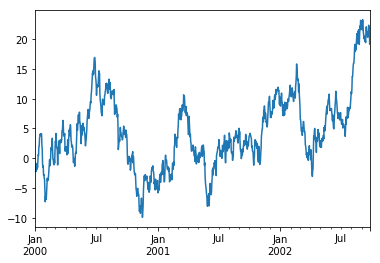

In [89]:
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

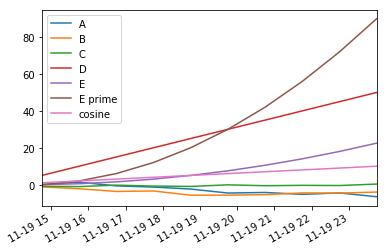

In [90]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')